# Project lab
In deze notebook gaan we a.d.h.v. de lifesnaps dataset proberen te voorspellen in welke mood een persoon zich bevindt.

## Verwerken dataset
We maken gebruik van de lifesnaps dataset, meer bepaald de fitbit data en de sema data. 

De fitbit dataset bevat alle meetgevens die we nodig hebben om de voorspellingen te doen. <br>De sema dataset bevat de resultaten van de surveys, daaruit halen we de Context and Mood survey.

In [52]:
#imports
%matplotlib inline
%reset
low_memory=False
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import math
import os
import ast
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


### Verwerken fitbit data
We hebben er voor gekozen om de nodige gevens uit een de database te halen en op te slaan in een csv. Daarna gebruiken we de csv's om individuele dataframes te maken die we samenvoegen tot één geheel.

In [2]:
client = MongoClient("mongodb://localhost:27017/")
 
db = client["lifesnaps"]
collection = db["fitbit"]
doc = collection.find_one({"type": "estimated_oxygen_variation"})
print(doc)

{'_id': ObjectId('62cc1f9ab41dcd4b1beae820'), 'id': ObjectId('621e2e8e67b776a24055b564'), 'type': 'estimated_oxygen_variation', 'data': {'timestamp': '05/24/21 01:03:30', 'Infrared to Red Signal Ratio': -4}}


In [3]:
# Functie om csv's te maken
def make_csv(table):
    query = {
        "type": table
    }
    data = list(collection.find(query))

    df = pd.DataFrame(data)

    if ' ' in table:
        table = table.replace(' ', '_')

    df.to_csv(f'{table}.csv', index=False)

    print(f'Data has been saved to {table}.csv')

# De gekozen tabellen 
tables = ['sleep', 'steps', 'lightly_active_minutes', 'moderately_active_minutes', 'very_active_minutes',
            'sedentary_minutes', 'Profile', 'Daily Heart Rate Variability Summary', 'resting_heart_rate']


for t in tables: 
    make_csv(t)

Data has been saved to sleep.csv
Data has been saved to steps.csv
Data has been saved to lightly_active_minutes.csv
Data has been saved to moderately_active_minutes.csv
Data has been saved to very_active_minutes.csv
Data has been saved to sedentary_minutes.csv
Data has been saved to Profile.csv
Data has been saved to Daily_Heart_Rate_Variability_Summary.csv
Data has been saved to resting_heart_rate.csv


Nu we de csv's hebben van de tabellen gaan we uit het "data" veld de nodige gegevens moeten halen. <br>Dit doen we csv per csv omdat niet elke csv dezelfe structuur binnen "data" bevat.<br>
Omdat het lang duurt om de gegevens uit het "data" veld te halen slaan we deze resultaten terug op in een nieuwe csv (steps en sleep duren voornamelijk lang).

In [12]:
count = 0
# Profile
df_profile = pd.read_csv("profile.csv")
df_profile['data'] = df_profile['data'].apply(eval)
df_profile_expanded = pd.concat([df_profile.drop(columns=['data']), df_profile['data'].apply(pd.Series)], axis=1)
df_profile_expanded = df_profile_expanded.drop(columns=['_id'])
df_profile_expanded.to_csv("profile_expanded.csv", index=False)
count += 1
print('ok', count)

# Resting heart rate
df_resting_heart_rate = pd.read_csv("resting_heart_rate.csv")
df_resting_heart_rate['data'] = df_resting_heart_rate['data'].apply(eval)
df_resting_heart_rate_expanded = pd.concat([df_resting_heart_rate.drop(columns=['data']), df_resting_heart_rate['data'].apply(pd.Series)], axis=1)
df_resting_heart_rate_expanded = pd.concat([df_resting_heart_rate_expanded.drop(columns=['value']), df_resting_heart_rate_expanded['value'].apply(pd.Series)], axis=1)
df_resting_heart_rate_expanded = df_resting_heart_rate_expanded.drop(columns=['_id'])
df_resting_heart_rate_expanded.to_csv("resting_heart_rate_expanded.csv", index=False)
count +=1
print('ok', count)


# Sedentary minutes
df_sedentary_minutes = pd.read_csv("sedentary_minutes.csv")
df_sedentary_minutes['data'] = df_sedentary_minutes['data'].apply(eval)
df_sedentary_minutes_expanded = pd.concat([df_sedentary_minutes.drop(columns=['data']), df_sedentary_minutes['data'].apply(pd.Series)], axis=1)
df_sedentary_minutes_expanded = df_sedentary_minutes_expanded.drop(columns=['_id'])
df_sedentary_minutes_expanded.to_csv("sedentary_minutes_expanded.csv", index=False)
count +=1
print('ok', count)


# Daily hrv summ
df_daily_hrv_summary = pd.read_csv("Daily_Heart_Rate_Variability_Summary.csv")
df_daily_hrv_summary['data'] = df_daily_hrv_summary['data'].apply(eval)
df_daily_hrv_summary_expanded = pd.concat([df_daily_hrv_summary.drop(columns=['data']), df_daily_hrv_summary['data'].apply(pd.Series)], axis=1)
df_daily_hrv_summary_expanded = df_daily_hrv_summary_expanded.drop(columns=['_id'])
df_daily_hrv_summary_expanded.to_csv("daily_hrv_summary_expanded.csv", index=False)
count +=1
print('ok', count)


# Lightly active minutes
df_lightly_active_minutes = pd.read_csv("lightly_active_minutes.csv")
df_lightly_active_minutes['data'] = df_lightly_active_minutes['data'].apply(eval)
df_lightly_active_minutes_expanded = pd.concat([df_lightly_active_minutes.drop(columns=['data']), df_lightly_active_minutes['data'].apply(pd.Series)], axis=1)
df_lightly_active_minutes_expanded = df_lightly_active_minutes_expanded.drop(columns=['_id'])
df_lightly_active_minutes_expanded.to_csv("lightly_active_minutes_expanded.csv", index=False)
count +=1
print('ok', count)

# Moderatly active minutes
df_moderately_active_minutes = pd.read_csv("moderately_active_minutes.csv")
df_moderately_active_minutes['data'] = df_moderately_active_minutes['data'].apply(eval)
df_moderately_active_minutes_expanded = pd.concat([df_moderately_active_minutes.drop(columns=['data']), df_moderately_active_minutes['data'].apply(pd.Series)], axis=1)
df_moderately_active_minutes_expanded = df_moderately_active_minutes_expanded.drop(columns=['_id'])
df_moderately_active_minutes_expanded.to_csv("moderately_active_minutes_expanded.csv", index=False)
count +=1
print('ok', count)

# Very active minutes
df_very_active_minutes = pd.read_csv("very_active_minutes.csv")
df_very_active_minutes['data'] = df_very_active_minutes['data'].apply(eval)
df_very_active_minutes_expanded = pd.concat([df_very_active_minutes.drop(columns=['data']), df_very_active_minutes['data'].apply(pd.Series)], axis=1)
df_very_active_minutes_expanded = df_very_active_minutes_expanded.drop(columns=['_id'])
df_very_active_minutes_expanded.to_csv("very_active_minutes_expanded.csv", index=False)
count +=1
print('ok', count)

# Steps
df_steps = pd.read_csv("steps.csv")
df_steps['data'] = df_steps['data'].map(ast.literal_eval)
data_expanded = pd.json_normalize(df_steps['data'])
df_steps = df_steps.drop(columns=['data', '_id'], errors='ignore')
df_steps_expanded = pd.concat([df_steps, data_expanded], axis=1)
df_steps_expanded.to_csv("steps_expanded.csv", index=False)
count +=1
print('ok', count)

# Sleep
df_sleep = pd.read_csv("sleep.csv")
df_sleep['data'] = df_sleep['data'].apply(eval)
df_sleep_expanded = pd.concat(
    [df_sleep.drop(columns=['data']), df_sleep['data'].apply(pd.Series)],
    axis=1
)
df_sleep_expanded = df_sleep_expanded.drop(columns=['_id'], errors='ignore')
df_sleep_expanded.to_csv("sleep_expanded.csv", index=False)
count +=1
print('ok', count)



ok 1
ok 2
ok 3
ok 4
ok 5
ok 6
ok 7
ok 8
ok 9


In [21]:
# very active minutes
df_vam = pd.read_csv('very_active_minutes_expanded.csv')

df_vam = df_vam.drop(columns=['type'])
df_vam['dateTime'] = pd.to_datetime(df_vam['dateTime']).dt.date
df_vam = df_vam.rename(columns={'dateTime': 'date', 'value': 'very_active_minutes'})


#sleep expanded
df_sleep = pd.read_csv('sleep_expanded.csv')

def extract_stage_minutes(levels_str, stage):
    try:
        levels_str = levels_str.replace('null', 'None')
        levels_dict = ast.literal_eval(levels_str)
        return levels_dict['summary'][stage]['minutes']
    except Exception:
        return None

df_sleep_minutes = pd.DataFrame({
    'id': df_sleep['id'],
    'date': df_sleep['dateOfSleep'],
    'sleep_deep_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'deep')),
    'sleep_wake_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'wake')),
    'sleep_light_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'light')),
    'sleep_rem_minutes': df_sleep['levels'].apply(lambda x: extract_stage_minutes(x, 'rem')),
})
df_sleep_minutes['date'] = pd.to_datetime(df_sleep_minutes['date']).dt.date

# steps
df_steps = pd.read_csv('steps_expanded.csv')

df_steps = df_steps.drop(columns=['type'])
df_steps['dateTime'] = pd.to_datetime(df_steps['dateTime']).dt.date
df_steps = df_steps.rename(columns={'dateTime': 'date', 'value': 'total_steps'})
df_steps = df_steps.groupby(['id', 'date'], as_index=False)['total_steps'].sum()

#df resting heart rate
df_resting_heart_rate = pd.read_csv('resting_heart_rate_expanded.csv')

df_resting_heart_rate = df_resting_heart_rate.drop(columns=['type', 'dateTime'])
df_resting_heart_rate = df_resting_heart_rate.rename(columns={'value': 'resting_heart_rate'})
df_resting_heart_rate['date'] = pd.to_datetime(df_resting_heart_rate['date']).dt.date

# df daily hr variability summ
df_daily_heart_rate_variability_summary = pd.read_csv('daily_hrv_summary_expanded.csv')

df_daily_heart_rate_variability_summary['dateTime'] = pd.to_datetime(df_daily_heart_rate_variability_summary['timestamp']).dt.date
df_daily_heart_rate_variability_summary = df_daily_heart_rate_variability_summary.drop(columns=['type', 'timestamp'])
df_daily_heart_rate_variability_summary = df_daily_heart_rate_variability_summary.rename(columns={'dateTime': 'date'})

# profile
df_profile = pd.read_csv('profile_expanded.csv')

df_profile = df_profile.drop(columns=['type', 'child', 'time_display_format', 'weight_unit', 'height_unit', 'distance_unit', 'water_unit', 'glucose_unit', 'swim_unit'])

# lightly active minutes
df_lightly_active_minutes = pd.read_csv('lightly_active_minutes_expanded.csv')

df_lightly_active_minutes = df_lightly_active_minutes.drop(columns=['type'])
df_lightly_active_minutes['dateTime'] = pd.to_datetime(df_lightly_active_minutes['dateTime']).dt.date
df_lightly_active_minutes = df_lightly_active_minutes.rename(columns={'dateTime': 'date', 'value': 'total_lightly_active_minutes'})
df_lightly_active_minutes = df_lightly_active_minutes.groupby(['id', 'date'], as_index=False)['total_lightly_active_minutes'].sum()

#moderatly active minutes
df_moderalty_active_minutes = pd.read_csv('moderately_active_minutes_expanded.csv')

df_moderalty_active_minutes = df_moderalty_active_minutes.drop(columns=['type'])
df_moderalty_active_minutes['dateTime'] = pd.to_datetime(df_moderalty_active_minutes['dateTime']).dt.date
df_moderalty_active_minutes = df_moderalty_active_minutes.rename(columns={'dateTime': 'date', 'value': 'total_moderately_active_minutes'})
df_moderalty_active_minutes = df_moderalty_active_minutes.groupby(['id', 'date'], as_index=False)['total_moderately_active_minutes'].sum()

#sedentary minutes
df_sedentary_minutes = pd.read_csv('sedentary_minutes_expanded.csv')

df_sedentary_minutes = df_sedentary_minutes.drop(columns=['type'])
df_sedentary_minutes['dateTime'] = pd.to_datetime(df_sedentary_minutes['dateTime']).dt.date
df_sedentary_minutes = df_sedentary_minutes.rename(columns={'dateTime': 'date', 'value': 'total_sedentary_minutes'})
df_sedentary_minutes = df_sedentary_minutes.groupby(['id', 'date'], as_index=False)['total_sedentary_minutes'].sum()



C:\Users\JanGe\AppData\Local\Temp\ipykernel_32116\3400560818.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vam['dateTime'] = pd.to_datetime(df_vam['dateTime']).dt.date
C:\Users\JanGe\AppData\Local\Temp\ipykernel_32116\3400560818.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_resting_heart_rate['date'] = pd.to_datetime(df_resting_heart_rate['date']).dt.date
C:\Users\JanGe\AppData\Local\Temp\ipykernel_32116\3400560818.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lightly_active_minutes['dateTime'] = pd.to_datetime(df_lightly_active_minutes['dateTim

### Verwerken Sema data

we gaan op dezelfde manier te werk als bij de Fitbit data. 

In [22]:
client = MongoClient("mongodb://localhost:27017/")
 
db = client["lifesnaps"]
collection = db["sema"]
doc = collection.find_one({"data.SURVEY_NAME": "Context and Mood Survey"})
print(doc)

{'_id': ObjectId('62cc7d568e3d174ffc0fbb47'), 'user_id': ObjectId('621e2f1b67b776a240b3d87c'), 'data': {'PARTICIPANT_ID': 's523044002', 'STUDY_ID': 'uk96OixJ-', 'STUDY_NAME': 'RAIS Consortium Experiment v2.0', 'STUDY_VERSION': 5, 'SURVEY_ID': 'BjTcu3Lg-', 'SURVEY_NAME': 'Context and Mood Survey', 'TRIGGER': 'scheduled', 'START_END': 1, 'CREATED_TS': '2021-12-15T15:26:00', 'SCHEDULED_TS': '2021-12-15T15:16:00', 'STARTED_TS': '2021-12-15T15:26:00', 'COMPLETED_TS': '2021-12-15T15:26:00', 'EXPIRED_TS': None, 'UPLOADED_TS': '2021-12-15T15:26:00', 'TOTAL_RT': '10030', 'RAND_PROB': '<no-response>', 'PLACE': 'HOME', 'PLACE_RT': '2440', 'OTHER': '<not-shown>', 'OTHER_RT': '<not-shown>', 'MOOD': 'TENSE/ANXIOUS', 'MOOD_RT': '7590', 'STEPS': '<no-response>', 'STEPS_RT': '<no-response>'}}


In [24]:
query = {
    "data.SURVEY_NAME": "Context and Mood Survey"
}

data = list(collection.find(query))

df_sleep = pd.DataFrame(data)

csv = "survey_result"

df_sleep.to_csv(f"{csv}.csv", index=False)

print(f"Data has been saved to {csv}.csv")

Data has been saved to survey_result.csv


In [25]:
csv = "survey_result"

df_sleep = pd.read_csv(f"{csv}.csv")

df_sleep['data'] = df_sleep['data'].apply(eval)
df_expanded = pd.concat(
    [df_sleep.drop(columns=['data']), df_sleep['data'].apply(pd.Series)],
    axis=1
)
df_expanded = df_expanded.drop(columns=['_id'], errors='ignore')

df_expanded.to_csv(f"{csv}_expanded.csv", index=False)

Als datum kolom gebruiken we 'SCHEDULED_TS', dat is de timestamp voor wanneer de survey is ingepland (wanneer de deelnemer de notificatie v.d. survey ontvangt) <sup>1</sup>

Om de mood te kwantificeren hebben we elke mood een score gegeven. Negatieve mood: -1, neutraal: 0 en positief: 1.
De mood survey werd 3 keer per dag afgenomen om tot een mood-score te komen maken we de som van de dag.


<sup>1</sup>https://www.nature.com/articles/s41597-022-01764-x#Sec20


In [26]:
df_survey = pd.read_csv('survey_result_expanded.csv')

df_survey_clean = df_survey[[
    'user_id', 'SCHEDULED_TS', 'MOOD'
    ]]

df_survey_clean = df_survey_clean.replace('<no-response>', np.NaN)

df_survey_clean = df_survey_clean.dropna()


df_survey_clean['SCHEDULED_TS'] = pd.to_datetime(df_survey_clean['SCHEDULED_TS']).dt.date

# print(df_survey_clean['MOOD'].unique())

moods = {
        'TENSE/ANXIOUS': -1, 'TIRED': -1, 'RESTED/RELAXED': 1, 'NEUTRAL': 0, 
        'HAPPY': 1, 'ALERT': -1, 'SAD': -1, 'SURPRISE': 0, 'FEAR': -1, 
        'ANGER': -1, 'SADNESS': -1, 'JOY': 1
        }

df_survey_clean['MOOD'] = df_survey_clean['MOOD'].map(moods)

df_survey_clean = df_survey_clean.groupby(['user_id', 'SCHEDULED_TS'], as_index=False)['MOOD'].sum()

df_survey_clean.rename(columns={'user_id': 'id', 'SCHEDULED_TS': 'date', 'MOOD': 'mood'}, inplace=True)

df_survey_clean.head()

,id,date,mood
0,621e2e8e67b776a24055b564,2021-05-25,0
1,621e2e8e67b776a24055b564,2021-05-26,1
2,621e2e8e67b776a24055b564,2021-05-27,3
3,621e2e8e67b776a24055b564,2021-05-28,1
4,621e2e8e67b776a24055b564,2021-05-29,2


### Dataframes samenvoegen

In [27]:
df_full = pd.merge(df_vam, df_sleep_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_steps, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_resting_heart_rate, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_daily_heart_rate_variability_summary, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_lightly_active_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_moderalty_active_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_sedentary_minutes, on=['id', 'date'], how='outer')
df_full = pd.merge(df_full, df_survey_clean, on=['id', 'date'], how='outer')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15950 entries, 0 to 15949
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               15950 non-null  object 
 1   date                             8061 non-null   object 
 2   very_active_minutes              8013 non-null   float64
 3   sleep_deep_minutes               3696 non-null   float64
 4   sleep_wake_minutes               3696 non-null   float64
 5   sleep_light_minutes              3696 non-null   float64
 6   sleep_rem_minutes                3696 non-null   float64
 7   total_steps                      5658 non-null   float64
 8   resting_heart_rate               13169 non-null  float64
 9   error                            13169 non-null  float64
 10  rmssd                            2873 non-null   float64
 11  nremhr                           2873 non-null   float64
 12  entropy           

Alle records waar er op een dag geen mood is halen we uit de dataset.

We steken daarna het dataframe in een csv.

In [34]:
df_full = df_full.dropna(subset=['mood'])
df_full = df_full.rename(columns={'id': 'user_id'})
df_full.info()

df_full.to_csv('df_complete.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2731 entries, 1 to 15691
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          2731 non-null   object 
 1   date                             2731 non-null   object 
 2   very_active_minutes              2684 non-null   float64
 3   sleep_deep_minutes               1856 non-null   float64
 4   sleep_wake_minutes               1856 non-null   float64
 5   sleep_light_minutes              1856 non-null   float64
 6   sleep_rem_minutes                1856 non-null   float64
 7   total_steps                      2513 non-null   float64
 8   resting_heart_rate               2436 non-null   float64
 9   error                            2436 non-null   float64
 10  rmssd                            1363 non-null   float64
 11  nremhr                           1363 non-null   float64
 12  entropy                 

## ML-modellen

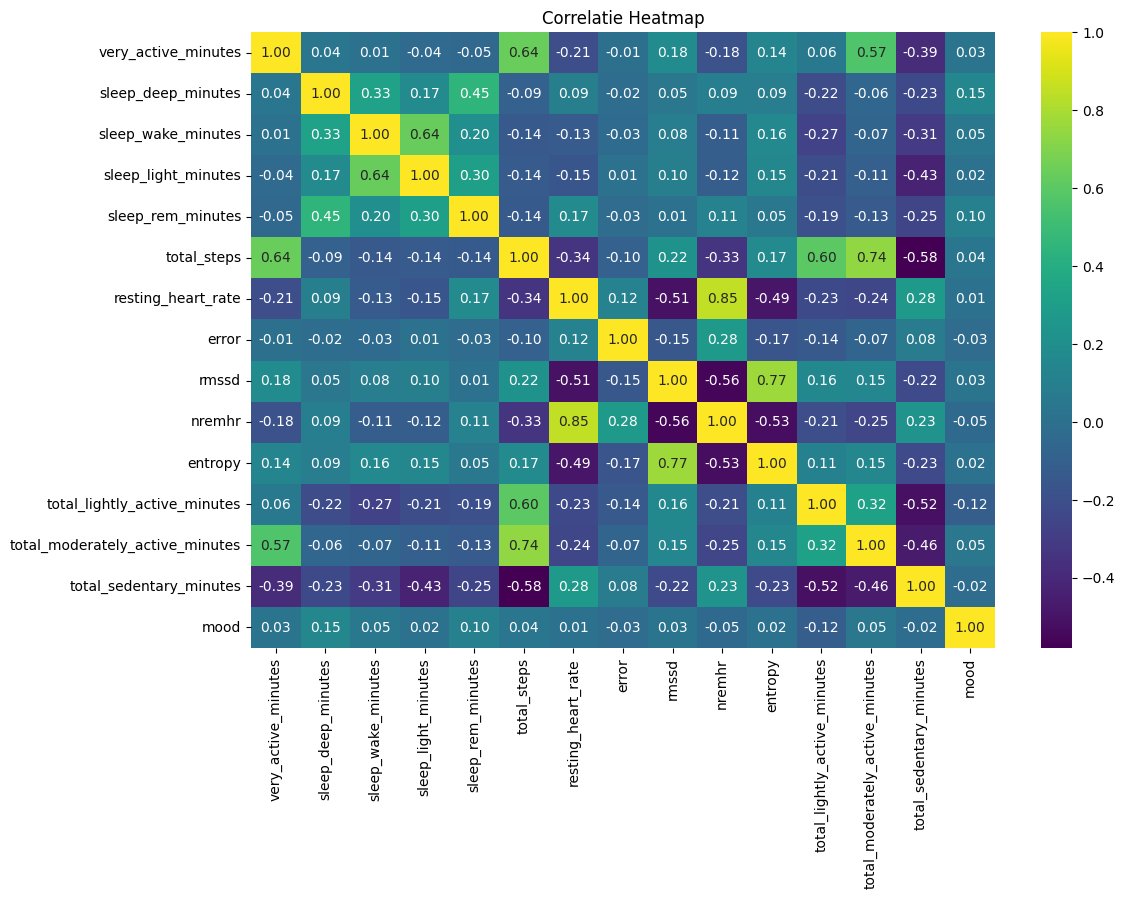

In [54]:
# Data inlezen
df = pd.read_csv('df_complete.csv')

# Onbruikbare kolommen verwijderen
df = df.drop(['user_id', 'date'], axis=1).dropna()

# Train-test split
X = df.drop('mood', axis=1)
y = df['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Correlatie heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f");
plt.title('Correlatie Heatmap')
plt.show()

              precision    recall  f1-score   support

        -3.0       0.50      0.17      0.25        18
        -2.0       0.33      0.24      0.28        25
        -1.0       0.27      0.48      0.35        54
         0.0       0.29      0.20      0.23        56
         1.0       0.25      0.40      0.31        43
         2.0       0.86      0.22      0.35        27
         3.0       0.50      0.24      0.32        17

    accuracy                           0.30       240
   macro avg       0.43      0.28      0.30       240
weighted avg       0.38      0.30      0.30       240

[[ 3  2  4  5  4  0  0]
 [ 0  6 10  3  6  0  0]
 [ 0  1 26  9 16  0  2]
 [ 1  3 26 11 15  0  0]
 [ 1  2 16  5 17  1  1]
 [ 1  1 10  4  4  6  1]
 [ 0  3  3  1  6  0  4]]


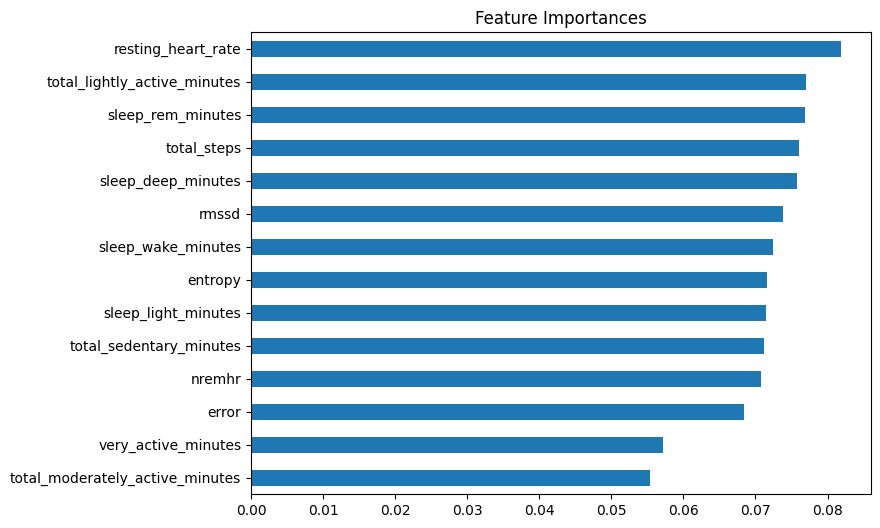

In [55]:
# Model trainen
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Voorspellen
y_pred = clf.predict(X_test)

# Evaluatie
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance plotten
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances')
plt.show()

In [56]:
# Selecteer top 5 belangrijkste features
top_features = importances.sort_values(ascending=False).head(5).index.tolist()

# Model 1: Random Forest met alle features
clf_all = RandomForestClassifier(random_state=42)
clf_all.fit(X_train, y_train)
print("Random Forest (alle features):")
print(classification_report(y_test, clf_all.predict(X_test)))

# Model 2: Random Forest met top features
clf_top = RandomForestClassifier(random_state=42)
clf_top.fit(X_train[top_features], y_train)
print("Random Forest (top features):")
print(classification_report(y_test, clf_top.predict(X_test[top_features])))

# Model 3: Logistic Regression met top features + scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_test_scaled = scaler.transform(X_test[top_features])

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)
print("Logistic Regression (top features, scaled):")
print(classification_report(y_test, logreg.predict(X_test_scaled)))

Random Forest (alle features):
              precision    recall  f1-score   support

        -3.0       0.50      0.17      0.25        18
        -2.0       0.33      0.24      0.28        25
        -1.0       0.27      0.48      0.35        54
         0.0       0.29      0.20      0.23        56
         1.0       0.25      0.40      0.31        43
         2.0       0.86      0.22      0.35        27
         3.0       0.50      0.24      0.32        17

    accuracy                           0.30       240
   macro avg       0.43      0.28      0.30       240
weighted avg       0.38      0.30      0.30       240

Random Forest (top features):
              precision    recall  f1-score   support

        -3.0       0.21      0.22      0.22        18
        -2.0       0.18      0.16      0.17        25
        -1.0       0.32      0.41      0.36        54
         0.0       0.26      0.21      0.24        56
         1.0       0.19      0.30      0.24        43
         2.0     

c:\Users\JanGe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JanGe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JanGe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [57]:
print(y_train.value_counts())

mood
-1.0    238
 1.0    211
 0.0    157
-2.0    126
-3.0     84
 2.0     76
 3.0     64
Name: count, dtype: int64


Je ziet hier duidelijk class imbalance: sommige mood-klassen komen veel vaker voor dan andere (bijvoorbeeld -1.0 en 1.0 zijn veel vaker aanwezig dan 3.0 of 2.0).

In [58]:
# Selecteer top 5 belangrijkste features
top_features = importances.sort_values(ascending=False).head(5).index.tolist()

# Model 1: Random Forest met alle features en class_weight
clf_all = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_all.fit(X_train, y_train)
print("Random Forest (alle features, balanced):")
print(classification_report(y_test, clf_all.predict(X_test)))

# Model 2: Random Forest met top features en class_weight
clf_top = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_top.fit(X_train[top_features], y_train)
print("Random Forest (top features, balanced):")
print(classification_report(y_test, clf_top.predict(X_test[top_features])))

# Model 3: Logistic Regression met top features en class_weight + scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_test_scaled = scaler.transform(X_test[top_features])

logreg = LogisticRegression(max_iter=10000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
print("Logistic Regression (top features, balanced, scaled):")
print(classification_report(y_test, logreg.predict(X_test_scaled)))

Random Forest (alle features, balanced):
              precision    recall  f1-score   support

        -3.0       0.50      0.22      0.31        18
        -2.0       0.21      0.12      0.15        25
        -1.0       0.23      0.43      0.29        54
         0.0       0.30      0.18      0.22        56
         1.0       0.22      0.35      0.27        43
         2.0       1.00      0.19      0.31        27
         3.0       0.55      0.35      0.43        17

    accuracy                           0.28       240
   macro avg       0.43      0.26      0.28       240
weighted avg       0.37      0.28      0.27       240

Random Forest (top features, balanced):
              precision    recall  f1-score   support

        -3.0       0.25      0.28      0.26        18
        -2.0       0.21      0.20      0.20        25
        -1.0       0.26      0.37      0.31        54
         0.0       0.35      0.25      0.29        56
         1.0       0.21      0.30      0.25        

Analyse:
Random Forest presteert iets beter met alle features dan met alleen de top features.
Sommige klassen worden nauwelijks of niet goed voorspeld (lage recall).
De class imbalance blijft een uitdaging, ondanks class_weight='balanced'.

In [59]:
# Kies alleen de gewenste features
selected_features = ['total_lightly_active_minutes', 'sleep_rem_minutes', 'sleep_deep_minutes']

# Model 1: Random Forest met geselecteerde features
clf_sel = RandomForestClassifier(random_state=42)
clf_sel.fit(X_train[selected_features], y_train)
print("Random Forest (selected features):")
print(classification_report(y_test, clf_sel.predict(X_test[selected_features])))

# Model 2: Random Forest met class_weight='balanced'
clf_sel_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_sel_bal.fit(X_train[selected_features], y_train)
print("Random Forest (selected features, balanced):")
print(classification_report(y_test, clf_sel_bal.predict(X_test[selected_features])))

# Model 3: Logistic Regression met scaling en class_weight='balanced'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

logreg = LogisticRegression(max_iter=10000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
print("Logistic Regression (selected features, balanced, scaled):")
print(classification_report(y_test, logreg.predict(X_test_scaled)))

Random Forest (selected features):
              precision    recall  f1-score   support

        -3.0       0.17      0.11      0.13        18
        -2.0       0.10      0.08      0.09        25
        -1.0       0.27      0.43      0.33        54
         0.0       0.27      0.18      0.22        56
         1.0       0.23      0.35      0.28        43
         2.0       0.30      0.11      0.16        27
         3.0       0.27      0.18      0.21        17

    accuracy                           0.24       240
   macro avg       0.23      0.20      0.20       240
weighted avg       0.24      0.24      0.23       240

Random Forest (selected features, balanced):
              precision    recall  f1-score   support

        -3.0       0.14      0.11      0.12        18
        -2.0       0.14      0.08      0.10        25
        -1.0       0.28      0.43      0.34        54
         0.0       0.25      0.18      0.21        56
         1.0       0.21      0.30      0.25        4

### Analyse van de modelresultaten

#### 1. Algemene prestaties
- De **accuracy** van alle modellen ligt tussen de **0.15 en 0.30**. Dit is laag, zeker gezien het aantal klassen (7).
- Zowel de **macro** als **weighted f1-scores** zijn laag (meestal < 0.30), wat aangeeft dat het model moeite heeft om alle klassen goed te voorspellen.

#### 2. Vergelijking van de modellen

##### Random Forest (alle features)
- Geeft de hoogste accuracy (~0.30) en macro f1-score (~0.30).
- Veelvoorkomende klassen (zoals -1.0 en 1.0) worden redelijk voorspeld.
- Zeldzame klassen (-3.0, 3.0, 2.0) worden veel minder goed voorspeld.
- Recall is vaak laag voor de zeldzame klassen.

##### Random Forest (top features)
- Prestaties zijn iets lager dan met alle features.
- Minder variatie in prestaties per klasse, maar overall niet beter.

##### Logistic Regression (top features, scaled)
- Nog lagere accuracy en f1-score.
- Sommige klassen worden helemaal niet voorspeld (precision/recall = 0).
- Het model heeft moeite met de complexiteit van de data.

##### Random Forest (selected features)
- Prestaties dalen verder bij gebruik van alleen de drie geselecteerde features.
- Accuracy en f1-score dalen naar ~0.15–0.24.

##### Modellen met `class_weight='balanced'`
- Er is een kleine verbetering voor zeldzame klassen, maar overall geen grote sprong.
- Class imbalance blijft een probleem.

#### 3. Belangrijkste inzichten

- **Class imbalance:** Zeldzame klassen (-3, -2, 2, 3) worden slecht voorspeld, ondanks het gebruik van `class_weight='balanced'`.
- **Feature selectie:** Minder features leidt tot lagere prestaties. Het model heeft meer informatie nodig om goed te kunnen voorspellen.
- **Modelkeuze:** Random Forest presteert beter dan Logistic Regression, maar beide modellen zijn beperkt in hun voorspellende kracht.
- **Complexiteit:** De relatie tussen de Fitbit-data en mood is waarschijnlijk zwak of niet-lineair, en mogelijk spelen er andere (niet-gemeten) factoren mee.

#### 4. Aanbevelingen -> wat we misschien nog kunnen doen

- **Klassen samenvoegen:** Overwegen om de 7 klassen (-3 -2 -1 0 1 2 3) te reduceren naar 3 (negatief, neutraal, positief) als dat inhoudelijk kan.